# The purpose of this notebook is to document the data analysis process of BellaBeat's Fitbit data


In [4]:
#Import necessary packages
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as dates

In [6]:
#Import data
df = pd.read_csv('Calories_Hourly_Union_Table.csv')

In [8]:
#Explore data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46183 entries, 0 to 46182
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            46183 non-null  int64 
 1   ActivityHour  46183 non-null  object
 2   Calories      46183 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [10]:
#Examining data entries
df.head()

,Id,ActivityHour,Calories
0,1503960366,3/12/2016 12:00:00 AM,48
1,1503960366,3/12/2016 1:00:00 AM,48
2,1503960366,3/12/2016 2:00:00 AM,48
3,1503960366,3/12/2016 3:00:00 AM,48
4,1503960366,3/12/2016 4:00:00 AM,48


## We need to convert the hourly calories into daily calories so we can combine it to our other daily table


In [13]:
# Creating a copy of the df to not repeat the loading of data.
df2 = df

In [15]:
#Converting the ActivityHour column to datetime type. In the cell above, it is listed as an object type.
#Converting ActivityHour type to a datetime type will help consolidate all dates into one day, so we can eliminate time
df2['ActivityHour'] = pd.to_datetime(df2['ActivityHour'])

/var/folders/lt/2y5zjz5s7xv6mwgmw4gcbgnr0000gn/T/ipykernel_2062/1761170864.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2['ActivityHour'] = pd.to_datetime(df2['ActivityHour'])


In [16]:
#checking work 
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46183 entries, 0 to 46182
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            46183 non-null  int64         
 1   ActivityHour  46183 non-null  datetime64[ns]
 2   Calories      46183 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.1 MB


In [19]:
#Now that ActivityHour is a datetime type, I will remove the time, leaving only the date
df2.head()

,Id,ActivityHour,Calories
0,1503960366,2016-03-12 00:00:00,48
1,1503960366,2016-03-12 01:00:00,48
2,1503960366,2016-03-12 02:00:00,48
3,1503960366,2016-03-12 03:00:00,48
4,1503960366,2016-03-12 04:00:00,48


In [21]:
#Eliminate the time, leaving only the date
df2['ActivityHour'] = df2['ActivityHour'].dt.date

In [23]:
#Check work for only dates
df2.head()

,Id,ActivityHour,Calories
0,1503960366,2016-03-12,48
1,1503960366,2016-03-12,48
2,1503960366,2016-03-12,48
3,1503960366,2016-03-12,48
4,1503960366,2016-03-12,48


In [25]:
#Rename ActivityHour to ActivityDay

df2 = df2.rename(columns = {'ActivityHour' : 'ActivityDay'})
df2.head()

,Id,ActivityDay,Calories
0,1503960366,2016-03-12,48
1,1503960366,2016-03-12,48
2,1503960366,2016-03-12,48
3,1503960366,2016-03-12,48
4,1503960366,2016-03-12,48


## Now I want to group the IDs by their respective dates and sum the calories, giving me the calories per day for each user


In [19]:
#Saving dataframe for SQL Exploration because it will be easier

df2.to_csv('CalorieDataV2.csv')

### Creating a query in SQL and sorting data by user, data, and summing calories proved much easier and than trying to use python


In [28]:
#Import newly queried data. *Note, spacing is for legibility
DailyCalories = pd.read_csv('Calories_Daily_Per_User.csv')

In [30]:
#Examine Data
DailyCalories.head()

,Id,ActivityDay,SUM(Calories)
0,1503960366,2016-03-12,2228
1,1503960366,2016-03-13,2100
2,1503960366,2016-03-14,1830
3,1503960366,2016-03-15,2111
4,1503960366,2016-03-16,1967


In [32]:
#Examine data info
DailyCalories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1935 entries, 0 to 1934
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1935 non-null   int64 
 1   ActivityDay    1935 non-null   object
 2   SUM(Calories)  1935 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 45.5+ KB


In [34]:
#Rename column SUM(Calories) to CaloriesBurned
DailyCalories = DailyCalories.rename(columns = {'SUM(Calories)':'CaloriesBurned'})
DailyCalories.head()

,Id,ActivityDay,CaloriesBurned
0,1503960366,2016-03-12,2228
1,1503960366,2016-03-13,2100
2,1503960366,2016-03-14,1830
3,1503960366,2016-03-15,2111
4,1503960366,2016-03-16,1967


#### Now that each user has daily calories, I want to take a look at all rows for exploration. 
#### These CaloriesBurned will be looked at with the weight table to examine any correlation in weight loss and calories burned

In [37]:
#Creating a database for the first ID in D
first_user = DailyCalories.loc[DailyCalories['Id'] == 1503960366]
first_user

,Id,ActivityDay,CaloriesBurned
0,1503960366,2016-03-12,2228
1,1503960366,2016-03-13,2100
2,1503960366,2016-03-14,1830
3,1503960366,2016-03-15,2111
4,1503960366,2016-03-16,1967
...,...,...,...
56,1503960366,2016-05-07,1819
57,1503960366,2016-05-08,1740
58,1503960366,2016-05-09,1820
59,1503960366,2016-05-10,1861


In [39]:
#I want to see all rows for my own exploration for any possible trends. Changing pandas settings will allow me to do so
pd.set_option('display.max_rows', 100)
first_user

,Id,ActivityDay,CaloriesBurned
0,1503960366,2016-03-12,2228
1,1503960366,2016-03-13,2100
2,1503960366,2016-03-14,1830
3,1503960366,2016-03-15,2111
4,1503960366,2016-03-16,1967
5,1503960366,2016-03-17,2039
6,1503960366,2016-03-18,2002
7,1503960366,2016-03-19,2057
8,1503960366,2016-03-20,2096
9,1503960366,2016-03-21,1846


In [41]:
#Resetting pandas setting for future exploration
pd.set_option('display.max_rows', 5)

In [44]:
first_user.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 0 to 60
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              61 non-null     int64 
 1   ActivityDay     61 non-null     object
 2   CaloriesBurned  61 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ KB


In [46]:
#ActivityDay is an object type and I want it to be a DateTime type
first_user['ActivityDay'] = pd.to_datetime(first_user['ActivityDay'])

/var/folders/lt/2y5zjz5s7xv6mwgmw4gcbgnr0000gn/T/ipykernel_2062/3544225173.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_user['ActivityDay'] = pd.to_datetime(first_user['ActivityDay'])


In [48]:
#Checking work
first_user.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 0 to 60
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Id              61 non-null     int64         
 1   ActivityDay     61 non-null     datetime64[ns]
 2   CaloriesBurned  61 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 KB


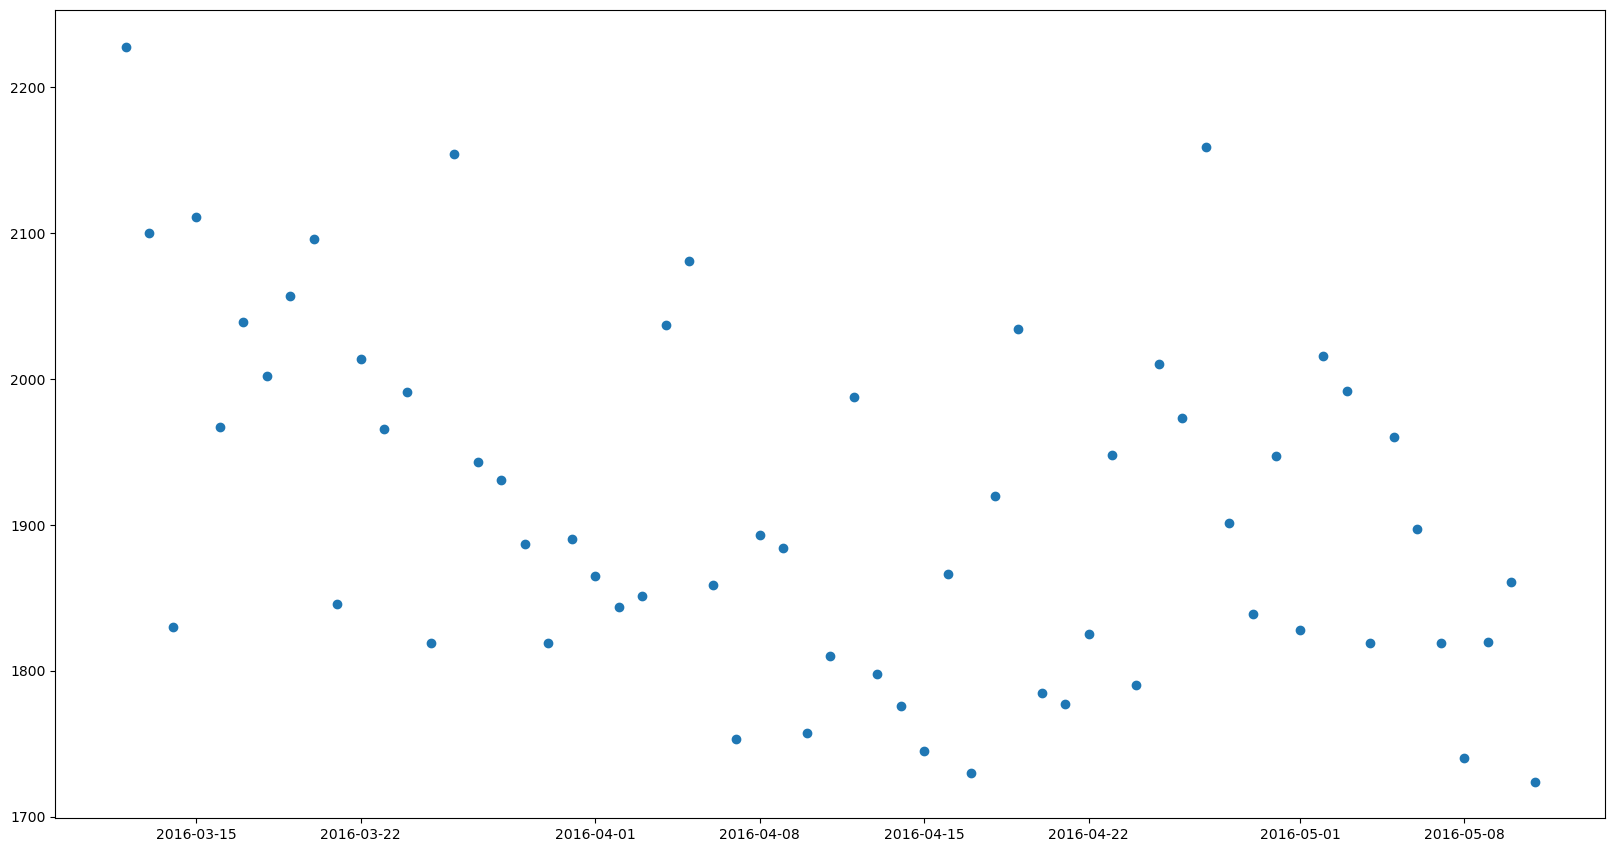

In [50]:
# Let's graph a scatterplot of calories burned for at first glance, they appear to decrease

fig, ax = plt.subplots()
fig.set_size_inches(20, 10.5)
plt.scatter(x = 'ActivityDay', y = 'CaloriesBurned', data = first_user)

plt.show()

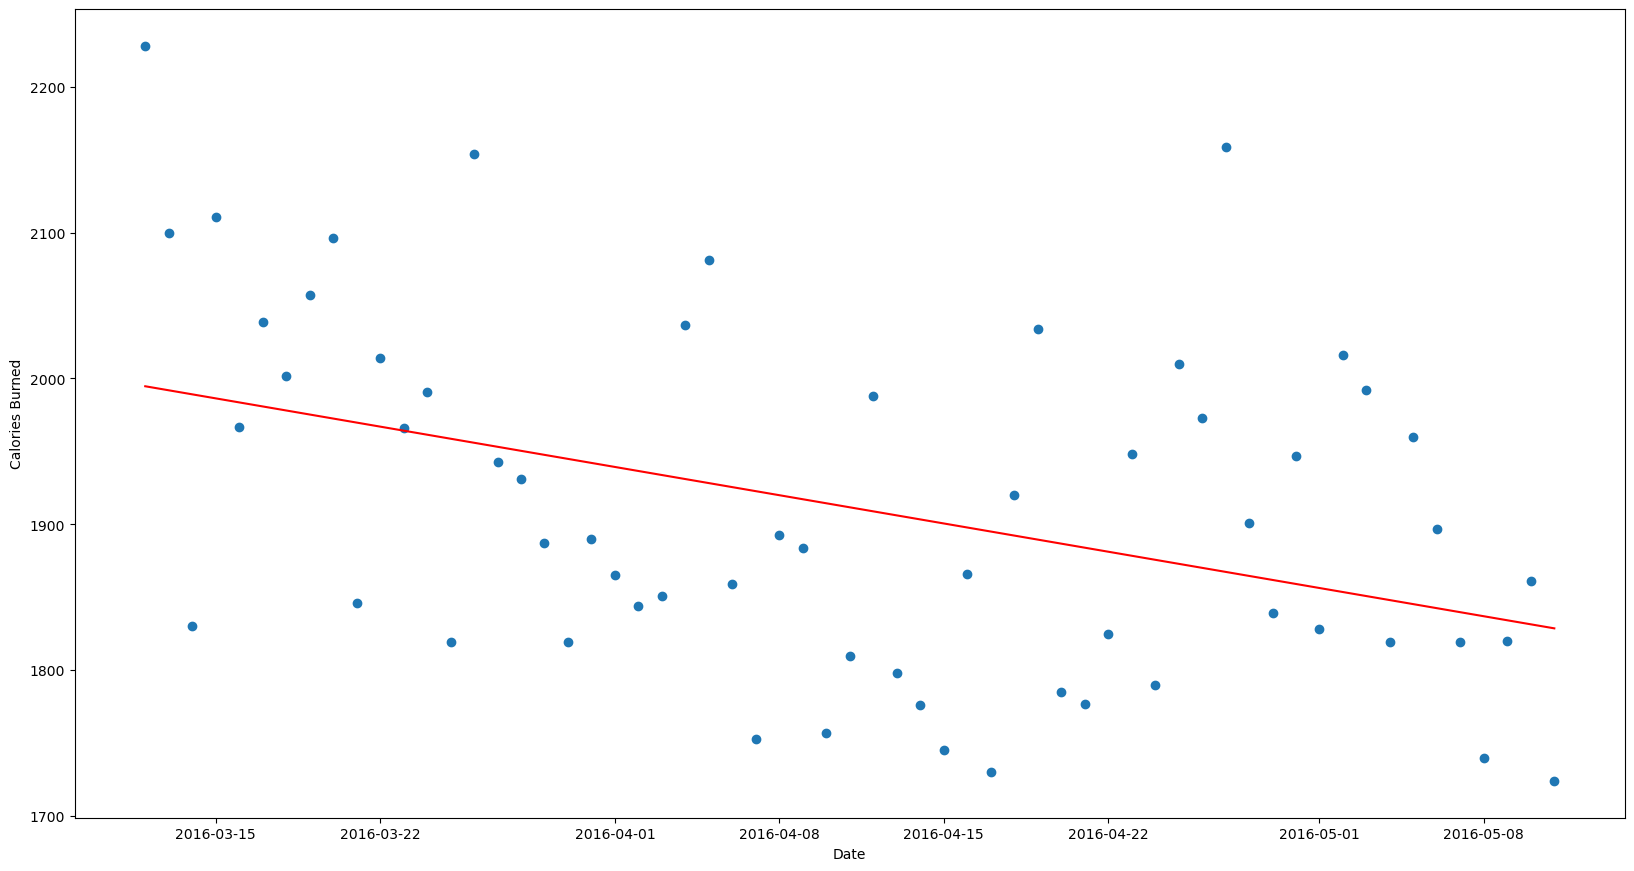

In [52]:
# Now let's create a trend line for our data to verify if the CaloriesBurned values are indeed declining

# Generate X and Y vairables
x = first_user['ActivityDay']
y = first_user['CaloriesBurned']

# Convert datetime values to numerical values
x_numeric = dates.date2num(x)

# Calculate a fit line
trend = np.polyfit(x_numeric, y, 1)
fit = np.poly1d(trend)

# General plot
fig, ax = plt.subplots()
fig.set_size_inches(20, 10.5)
plt.scatter(x, first_user['CaloriesBurned'])
plt.xlabel('Date')
plt.ylabel('Calories Burned')

# Now trendline
plt.plot(x, fit(x_numeric), "r-")

# And show
plt.show()

#### The calories burned gives us a negative trending outcome

## Now that we see we can identify a user's CaloriesBurned information, let's try this for 2 users who have enough data logged to track their weight but first, we need to clean up the weight_daily table.


In [77]:
#Load data
weights_df = pd.read_csv('Weight_Daily_Per_User.csv')

In [79]:
#Examine Data
weights_df.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,6962181067,3/30/2016 11:59:59 PM,61.500000,135.584291,NaN,24.030001,True,1459382399000
1,6962181067,3/31/2016 11:59:59 PM,61.500000,135.584291,NaN,24.030001,True,1459468799000
2,6962181067,4/1/2016 11:59:59 PM,60.900002,134.261521,NaN,23.780001,True,1459555199000
3,6962181067,4/2/2016 11:59:59 PM,61.200001,134.922906,NaN,23.889999,True,1459641599000
4,6962181067,4/3/2016 11:59:59 PM,61.500000,135.584291,NaN,24.030001,True,1459727999000


In [81]:
#Examine data info
weights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              100 non-null    int64  
 1   Date            100 non-null    object 
 2   WeightKg        100 non-null    float64
 3   WeightPounds    100 non-null    float64
 4   Fat             0 non-null      float64
 5   BMI             100 non-null    float64
 6   IsManualReport  100 non-null    bool   
 7   LogId           100 non-null    int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 5.7+ KB


In [83]:
#Ensure there are only two Ids in this dataset
weights_df['Id'].value_counts()

Id
6962181067    58
8877689391    42
Name: count, dtype: int64

In [85]:
#Convert Date to DateTime type and drop the hour marker
weights_df['Date'] = pd.to_datetime(weights_df['Date'])
weights_df['Date'] = weights_df['Date'].dt.date
weights_df['Date'] = pd.to_datetime(weights_df['Date'])

#The first and third lines are repeated on purpose because python reverts the Date column back to an obj type after 
#removing the hour stamp. You cannot remove the hour stamp without first changing the type to datetime.

/var/folders/lt/2y5zjz5s7xv6mwgmw4gcbgnr0000gn/T/ipykernel_2062/3563184521.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  weights_df['Date'] = pd.to_datetime(weights_df['Date'])


In [87]:
#Check work for time removal in Date column
weights_df.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,6962181067,2016-03-30,61.500000,135.584291,NaN,24.030001,True,1459382399000
1,6962181067,2016-03-31,61.500000,135.584291,NaN,24.030001,True,1459468799000
2,6962181067,2016-04-01,60.900002,134.261521,NaN,23.780001,True,1459555199000
3,6962181067,2016-04-02,61.200001,134.922906,NaN,23.889999,True,1459641599000
4,6962181067,2016-04-03,61.500000,135.584291,NaN,24.030001,True,1459727999000


In [89]:
#Checking work for datetime type for column
weights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Id              100 non-null    int64         
 1   Date            100 non-null    datetime64[ns]
 2   WeightKg        100 non-null    float64       
 3   WeightPounds    100 non-null    float64       
 4   Fat             0 non-null      float64       
 5   BMI             100 non-null    float64       
 6   IsManualReport  100 non-null    bool          
 7   LogId           100 non-null    int64         
dtypes: bool(1), datetime64[ns](1), float64(4), int64(2)
memory usage: 5.7 KB


In [91]:
#Further exploration shows all values are missing for the FAT column, so we can drop that. 
pd.set_option('display.max_rows', 8)
weights_df.isnull().sum()

Id                  0
Date                0
WeightKg            0
WeightPounds        0
Fat               100
BMI                 0
IsManualReport      0
LogId               0
dtype: int64

In [93]:
#We do not need WeightKg, Fat, BMI, or IsManualReport
weights_df = weights_df.drop(['WeightKg','Fat','BMI','IsManualReport'], axis = 1)
weights_df.head()

,Id,Date,WeightPounds,LogId
0,6962181067,2016-03-30,135.584291,1459382399000
1,6962181067,2016-03-31,135.584291,1459468799000
2,6962181067,2016-04-01,134.261521,1459555199000
3,6962181067,2016-04-02,134.922906,1459641599000
4,6962181067,2016-04-03,135.584291,1459727999000


In [95]:
#Let's round our pounds to the nearest whole pound
weights_df.round({'WeightPounds':0})

,Id,Date,WeightPounds,LogId
0,6962181067,2016-03-30,136.0,1459382399000
1,6962181067,2016-03-31,136.0,1459468799000
2,6962181067,2016-04-01,134.0,1459555199000
3,6962181067,2016-04-02,135.0,1459641599000
...,...,...,...,...
96,8877689391,2016-05-08,188.0,1462692953000
97,8877689391,2016-05-09,188.0,1462775984000
98,8877689391,2016-05-11,188.0,1462949507000
99,8877689391,2016-05-12,185.0,1463035373000


In [97]:
#Change the WeightPounds type to an integer
weights_df['WeightPounds'] =weights_df['WeightPounds'].astype(int)
weights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            100 non-null    int64         
 1   Date          100 non-null    datetime64[ns]
 2   WeightPounds  100 non-null    int64         
 3   LogId         100 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 3.3 KB


### Now we need our DailyCalories df to hold only the two IDs we are working with, so we need to clean that data, which we'll do in SQL

In [99]:
#After cleaning data in sql, lets import new calorie information
calorie_info = pd.read_csv('Calorie_Information.csv')

In [101]:
#Open data
calorie_info

,Id,ActivityDay,SUM(Calories)
0,6962181067,2016-03-12,2275
1,6962181067,2016-03-13,2049
2,6962181067,2016-03-14,2259
3,6962181067,2016-03-15,2010
...,...,...,...
120,8877689391,2016-05-09,3695
121,8877689391,2016-05-10,2826
122,8877689391,2016-05-11,3827
123,8877689391,2016-05-12,1771


In [111]:
#Checking to ensure df contains only the two IDs
calorie_info['Id'].value_counts()

Id
6962181067    62
8877689391    62
Name: count, dtype: int64

In [113]:
#I want to explore the first ID seperately from the other one, so I'll giv it its own dataframe
first_user = calorie_info.loc[calorie_info['Id'] == 6962181067]

In [115]:
#checking for duplicated values
first_user['ActivityDay'].duplicated().sum()

0

In [117]:
#Creating dataframe for second user
second_user = calorie_info.loc[calorie_info['Id'] == 8877689391]

In [119]:
#Checking for duplicates
second_user['ActivityDay'].duplicated().sum()

0

### Calorie_info and weights_df do not share the same rows count, so we need to clean calories_df(124 rows) to match weights_df(100 rows)

In [122]:
#Create and join my two dataframes
innerjoin = weights_df.join(calorie_info, how = 'inner', lsuffix='_weight', rsuffix='_calorie')
innerjoin

,Id_weight,Date,WeightPounds,LogId,Id_calorie,ActivityDay,SUM(Calories)
0,6962181067,2016-03-30,135,1459382399000,6962181067,2016-03-12,2275
1,6962181067,2016-03-31,135,1459468799000,6962181067,2016-03-13,2049
2,6962181067,2016-04-01,134,1459555199000,6962181067,2016-03-14,2259
3,6962181067,2016-04-02,134,1459641599000,6962181067,2016-03-15,2010
...,...,...,...,...,...,...,...
96,8877689391,2016-05-08,188,1462692953000,8877689391,2016-04-15,3920
97,8877689391,2016-05-09,188,1462775984000,8877689391,2016-04-16,4534
98,8877689391,2016-05-11,188,1462949507000,8877689391,2016-04-17,3538
99,8877689391,2016-05-12,185,1463035373000,8877689391,2016-04-18,2757


In [124]:
#Cleaning unnecessary columns and renaming some
innerjoin = innerjoin.drop(columns = ['Id_calorie', 'ActivityDay'])
innerjoin = innerjoin.rename(columns = {'SUM(Calories)':'Calories_Burned', 'Id_weight':'Id'})
innerjoin

,Id,Date,WeightPounds,LogId,Calories_Burned
0,6962181067,2016-03-30,135,1459382399000,2275
1,6962181067,2016-03-31,135,1459468799000,2049
2,6962181067,2016-04-01,134,1459555199000,2259
3,6962181067,2016-04-02,134,1459641599000,2010
...,...,...,...,...,...
96,8877689391,2016-05-08,188,1462692953000,3920
97,8877689391,2016-05-09,188,1462775984000,4534
98,8877689391,2016-05-11,188,1462949507000,3538
99,8877689391,2016-05-12,185,1463035373000,2757


In [126]:
#Reordering columns for legibility
innerjoin = innerjoin[['Id','Date','WeightPounds','Calories_Burned','LogId']]
innerjoin

,Id,Date,WeightPounds,Calories_Burned,LogId
0,6962181067,2016-03-30,135,2275,1459382399000
1,6962181067,2016-03-31,135,2049,1459468799000
2,6962181067,2016-04-01,134,2259,1459555199000
3,6962181067,2016-04-02,134,2010,1459641599000
...,...,...,...,...,...
96,8877689391,2016-05-08,188,3920,1462692953000
97,8877689391,2016-05-09,188,4534,1462775984000
98,8877689391,2016-05-11,188,3538,1462949507000
99,8877689391,2016-05-12,185,2757,1463035373000


In [128]:
#Establishing first df
pd.set_option('display.max_rows', 80)
first_user = innerjoin.loc[innerjoin['Id'] == 6962181067]
first_user

,Id,Date,WeightPounds,Calories_Burned,LogId
0,6962181067,2016-03-30,135,2275,1459382399000
1,6962181067,2016-03-31,135,2049,1459468799000
2,6962181067,2016-04-01,134,2259,1459555199000
3,6962181067,2016-04-02,134,2010,1459641599000
4,6962181067,2016-04-03,135,2523,1459727999000
5,6962181067,2016-04-04,137,2803,1459814399000
6,6962181067,2016-04-05,136,2876,1459900799000
7,6962181067,2016-04-06,137,2354,1459987199000
8,6962181067,2016-04-07,137,2445,1460073599000
9,6962181067,2016-04-08,136,2448,1460159999000


In [130]:
#Checking for duplicate dates to verufy a linear timeline
first_user['Date'].duplicated().sum()

15

In [132]:
#Dropping duplicates and keeping original entries
first_user = first_user.drop_duplicates(subset = ['Date'], keep = 'first')
first_user

,Id,Date,WeightPounds,Calories_Burned,LogId
0,6962181067,2016-03-30,135,2275,1459382399000
1,6962181067,2016-03-31,135,2049,1459468799000
2,6962181067,2016-04-01,134,2259,1459555199000
3,6962181067,2016-04-02,134,2010,1459641599000
4,6962181067,2016-04-03,135,2523,1459727999000
5,6962181067,2016-04-04,137,2803,1459814399000
6,6962181067,2016-04-05,136,2876,1459900799000
7,6962181067,2016-04-06,137,2354,1459987199000
8,6962181067,2016-04-07,137,2445,1460073599000
9,6962181067,2016-04-08,136,2448,1460159999000


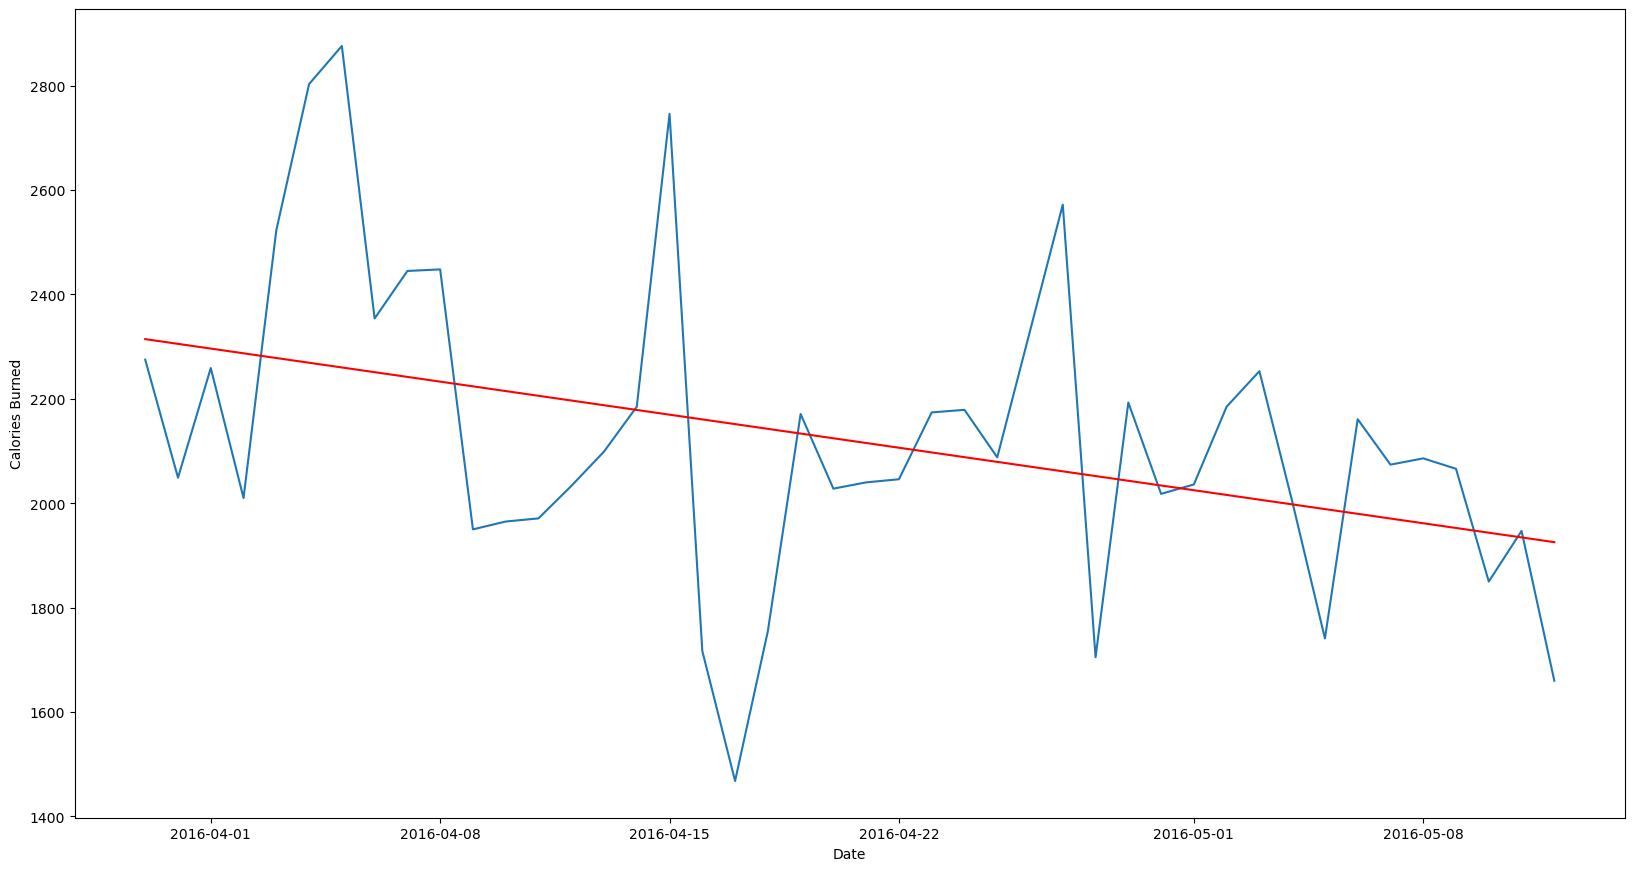

In [150]:
#Graphing first user's calories burned timeline and generating a trend line to show trend

x = first_user['Date']
y = first_user['Calories_Burned']

# Convert datetime values to numerical values
x_numeric = dates.date2num(x)

# Calculate a fit line
trend = np.polyfit(x_numeric, y, 1)
fit = np.poly1d(trend)

# General plot again
fig, ax = plt.subplots()
fig.set_size_inches(20, 10.5)
plt.plot(x, y)
plt.xlabel('Date')
plt.ylabel('Calories Burned')

# Now trendline
plt.plot(x, fit(x_numeric), "r-")

# And show
plt.show()

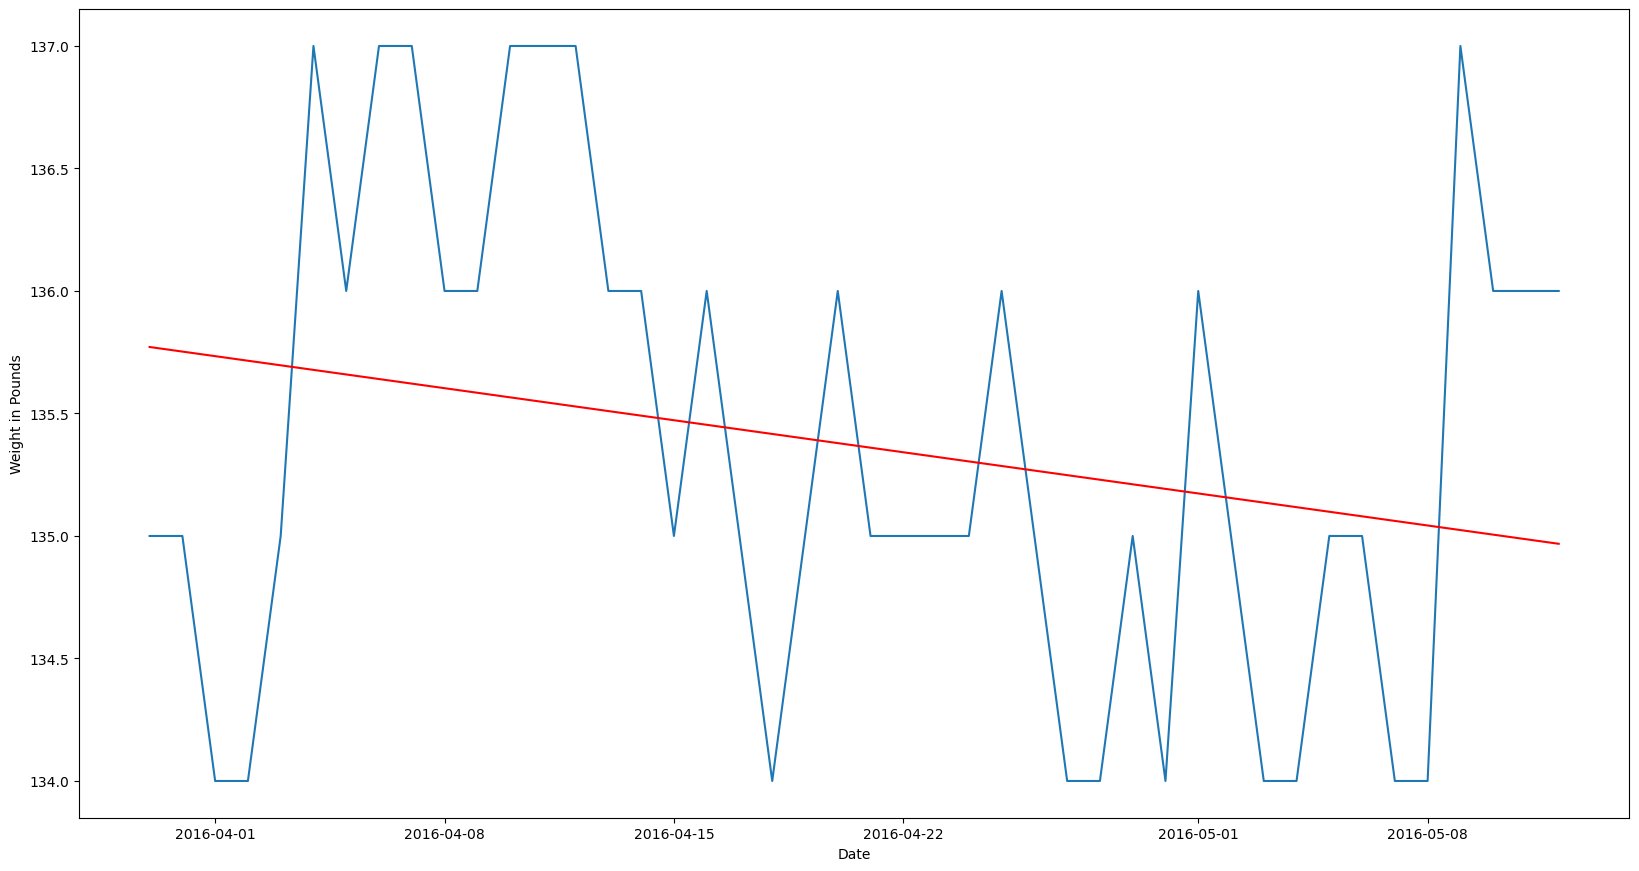

In [138]:
#Graphing the first user's weight timeline and generating a trend line to show the trend

#Create X and Y variables
x = first_user['Date']
y = first_user['WeightPounds']

# Convert datetime values to numerical values
x_numeric = dates.date2num(x)

# Calculate a fit line
trend = np.polyfit(x_numeric, y, 1)
fit = np.poly1d(trend)

# General plot
fig, ax = plt.subplots()
fig.set_size_inches(20, 10.5)
plt.plot(x, y)
plt.xlabel('Date')
plt.ylabel('Weight in Pounds')

# Now trendline
plt.plot(x, fit(x_numeric), "r-")

# And show
plt.show()

### We can see the first user's calories burned starts to decline and their end weight is greater than when they started although the weight trend line is negative.


## Now, to analyze the second user's trends

In [140]:
#Create DF for second user
second_user = innerjoin.loc[innerjoin['Id'] == 8877689391]
second_user

,Id,Date,WeightPounds,Calories_Burned,LogId
58,8877689391,2016-04-01,188,2105,1459493380000
59,8877689391,2016-04-04,190,2361,1459752823000
60,8877689391,2016-04-05,189,1855,1459838415000
61,8877689391,2016-04-06,190,925,1459925371000
62,8877689391,2016-04-07,187,3889,1460009708000
63,8877689391,2016-04-08,187,2800,1460097584000
64,8877689391,2016-04-09,188,3677,1460189172000
65,8877689391,2016-04-11,189,2814,1460357889000
66,8877689391,2016-04-12,189,3486,1460443631000
67,8877689391,2016-04-01,188,3675,1459493380000


In [142]:
#Check for duplicate date entries
second_user['Date'].duplicated().sum()

10

In [144]:
#Dropping duplicates and keeping original entries
second_user = second_user.drop_duplicates(subset = ['Date'], keep = 'first')
second_user

,Id,Date,WeightPounds,Calories_Burned,LogId
58,8877689391,2016-04-01,188,2105,1459493380000
59,8877689391,2016-04-04,190,2361,1459752823000
60,8877689391,2016-04-05,189,1855,1459838415000
61,8877689391,2016-04-06,190,925,1459925371000
62,8877689391,2016-04-07,187,3889,1460009708000
63,8877689391,2016-04-08,187,2800,1460097584000
64,8877689391,2016-04-09,188,3677,1460189172000
65,8877689391,2016-04-11,189,2814,1460357889000
66,8877689391,2016-04-12,189,3486,1460443631000
77,8877689391,2016-04-13,187,4731,1460530500000


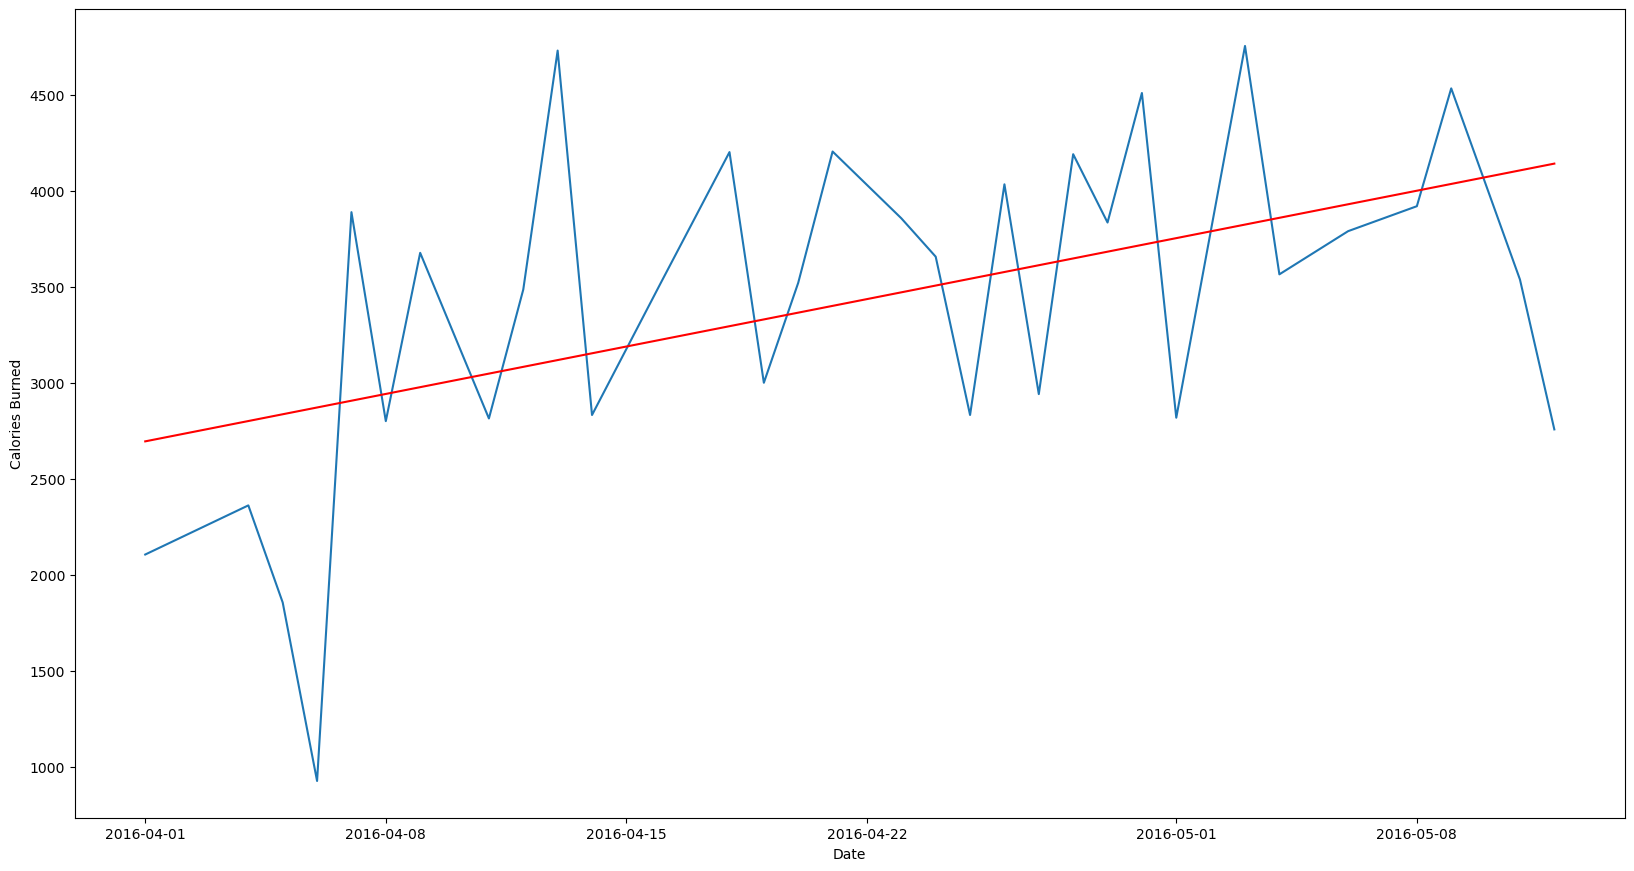

In [146]:
#Graphing the second user's calories burned timeline and generating a trend line to show the trend

#Generate X and Y variables
x = second_user['Date']
y = second_user['Calories_Burned']

# Convert datetime values to numerical values
x_numeric = dates.date2num(x)

# Calculate a fit line
trend = np.polyfit(x_numeric, y, 1)
fit = np.poly1d(trend)

# General plot
fig, ax = plt.subplots()
fig.set_size_inches(20, 10.5)
plt.plot(x, y)
plt.xlabel('Date')
plt.ylabel('Calories Burned')

# Now trendline
plt.plot(x, fit(x_numeric), "r-")

# And show
plt.show()

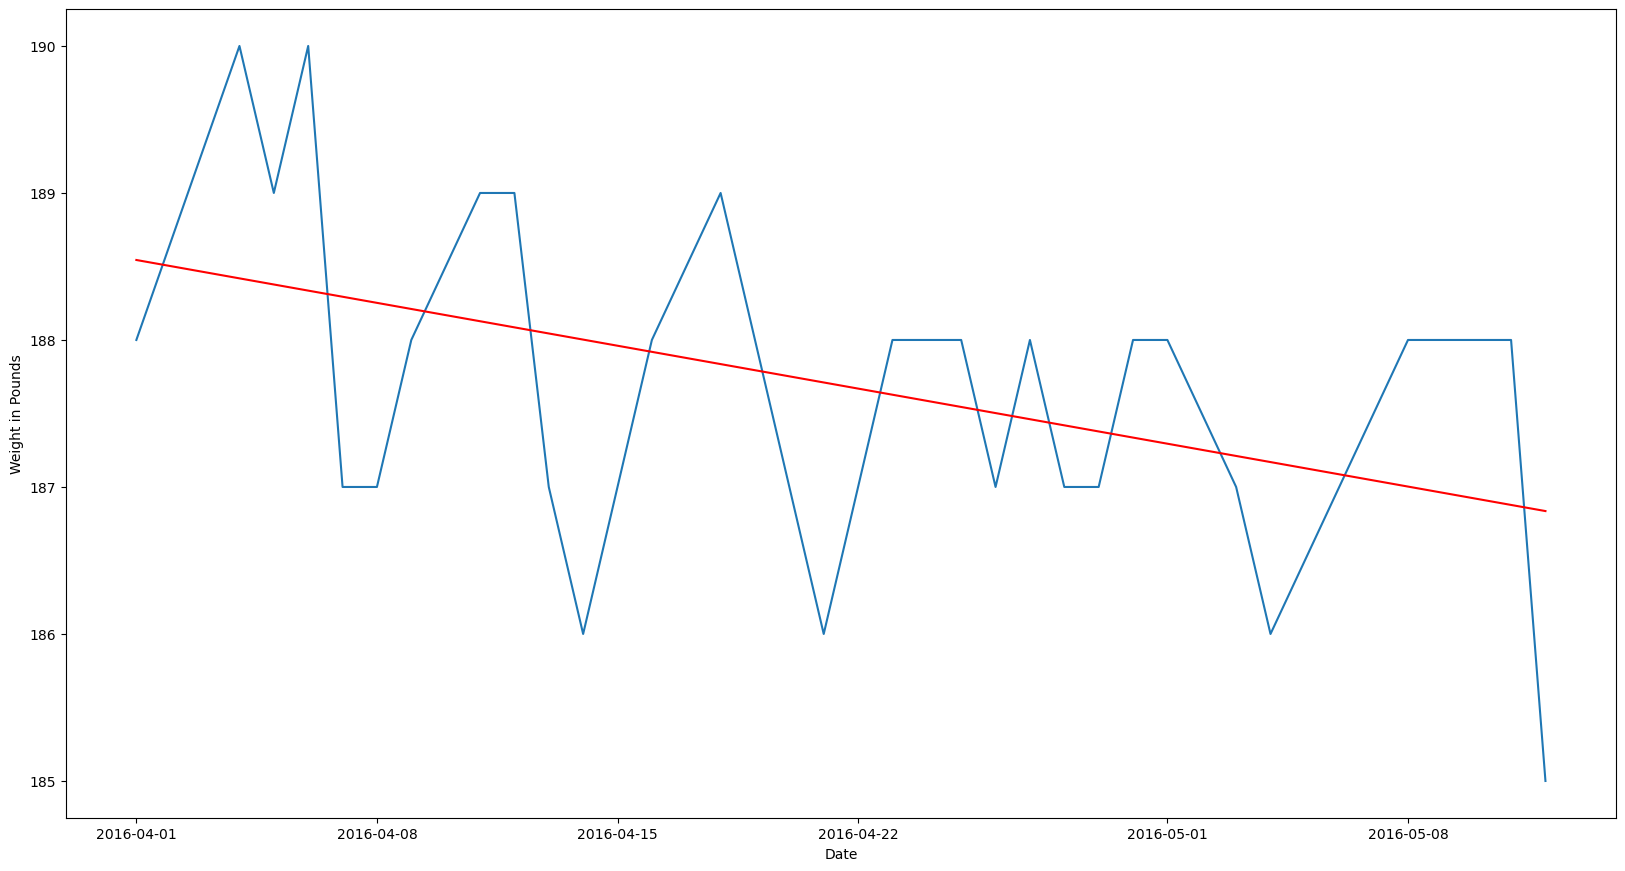

In [148]:
#Graphing the second user's weight timeline and generating a trend line to show the trend

x = second_user['Date']
y = second_user['WeightPounds']

# Convert datetime values to numerical values
x_numeric = dates.date2num(x)

# Calculate a fit line
trend = np.polyfit(x_numeric, y, 1)
fit = np.poly1d(trend)

# General plot
fig, ax = plt.subplots()
fig.set_size_inches(20, 10.5)
plt.plot(x, y)
plt.xlabel('Date')
plt.ylabel('Weight in Pounds')

# Now trendline
plt.plot(x, fit(x_numeric), "r-")

# And show
plt.show()

## The second user increased calories burned and as a result, lost weight from when they started.